## Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

## Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

**Let us import the required libraries and functions**

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

## Read Data

In [2]:
# read csv file using pandas
df_insurance = pd.read_csv("healthinsurance.csv")

# display the top 5 rows of the dataframe
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


## Data Analysis and Preparation

### Data Dimension

In [3]:
df_insurance.shape

(15000, 13)

We see the dataframe has 13 columns and 15000 observations.

**Check data types**

In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


### Summary Statistics

In [5]:
# describe the numerical data
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_ex,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


**2. For categorical features, we use .describe(include=object)**

In [7]:
df_insurance.describe(include = object).T

,count,unique,top,freq
sex,15000,2,female,7652
hereditary_diseases,15000,10,NoDisease,13998
city,15000,91,NewOrleans,302
job_title,15000,35,Student,1320


In [8]:
for i in df_insurance.select_dtypes(include= 'object').columns:
    print(df_insurance[i].value_counts())
    print('--------------------------')

sex
female    7652
male      7348
Name: count, dtype: int64
--------------------------
hereditary_diseases
NoDisease       13998
Diabetes          148
Alzheimer         144
Obesity           136
EyeDisease        123
Cancer            109
Arthritis          96
HeartDisease       93
Epilepsy           84
High BP            69
Name: count, dtype: int64
--------------------------
city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64
--------------------------
job_title
Student              1320
HomeMakers            972
Singer                744
Actor                 720
FilmMaker             714
Dancer                693
HouseKeeper           667
Manager               602
Police                412
Photographer          400
Beautician            385
CEO                   384
Engineer              374
Fash

### Missing Values

In [9]:
df_insurance.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [10]:
df_insurance.isnull().sum()/len(df_insurance)*100

age                    2.640000
sex                    0.000000
weight                 0.000000
bmi                    6.373333
hereditary_diseases    0.000000
no_of_dependents       0.000000
smoker                 0.000000
city                   0.000000
bloodpressure          0.000000
diabetes               0.000000
regular_ex             0.000000
job_title              0.000000
claim                  0.000000
dtype: float64

The missing values are present in the data for the `age` and `bmi` variables. There are 396 (2.6%) missing values for the variable `age` and 956 (6.4%) missing values for the variable `bmi`

### Visualize Missing Values using Heatmap

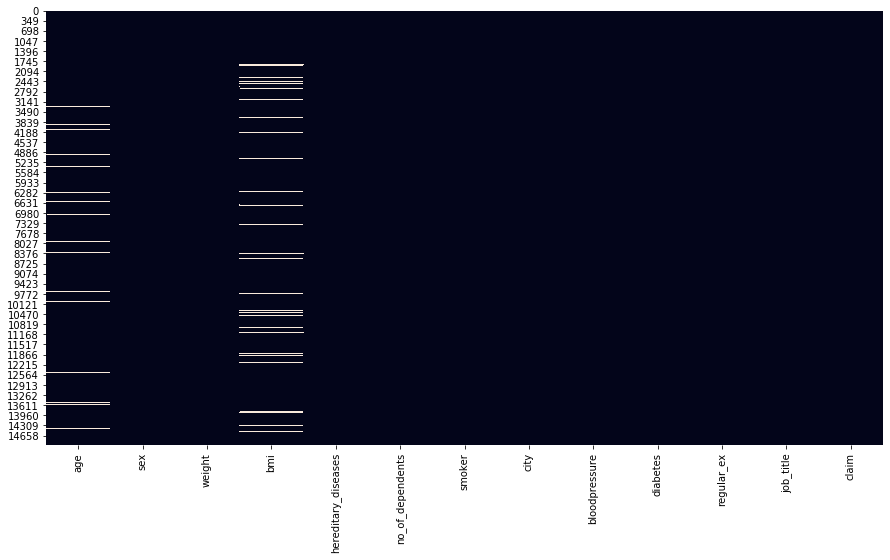

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_insurance.isnull(), cbar=False)

# display the plot
plt.show()

## Missing Value Imputation

In [3]:
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)
df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

We have seen that the the minimum bloodpressure is 0, which is absurd. It implies that these are missing values. 
Let us replace these missing values with the median value.

In [5]:
median_bloodpressure = df_insurance['bloodpressure'].median()

df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure) 

Recheck the summary statistics to confirm the missing value treatment for the variable 'bloodpressure'.

In [14]:
df_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,39.547521,13.829705,18.0,27.0,40.00,51.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,15000.0,30.266413,5.924606,16.0,25.9,29.80,34.100,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,72.228533,11.269793,40.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_ex,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


To confirm the data is valid, observe the minimum and maximum value of the variable `bloodpressure` is 40, which can be possible with patients suffering from low bloodpressure.

In [6]:
df_insurance.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

Now, we obtain the dataset with no missing values.

### Correlation

In [15]:
df_numeric_features = df_insurance[['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim']]

The dataframe df_numeric_features has 6 numeric variables.

**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

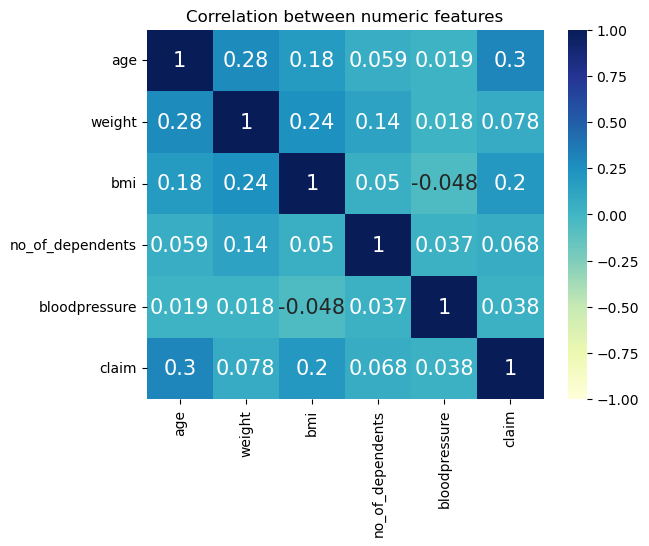

In [17]:
sns.heatmap(df_numeric_features.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It can be observe that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [ ]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df_insurance.describe(include=object)

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,Nashville,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


There are 6 categorical variables. From the output we see that the variable cities has most number of categories. There are 91 cities in the data, of which NewOrleans occurs highes number of times.

Let us visualize the variables. However, we shall exculde the variable `city` from it.

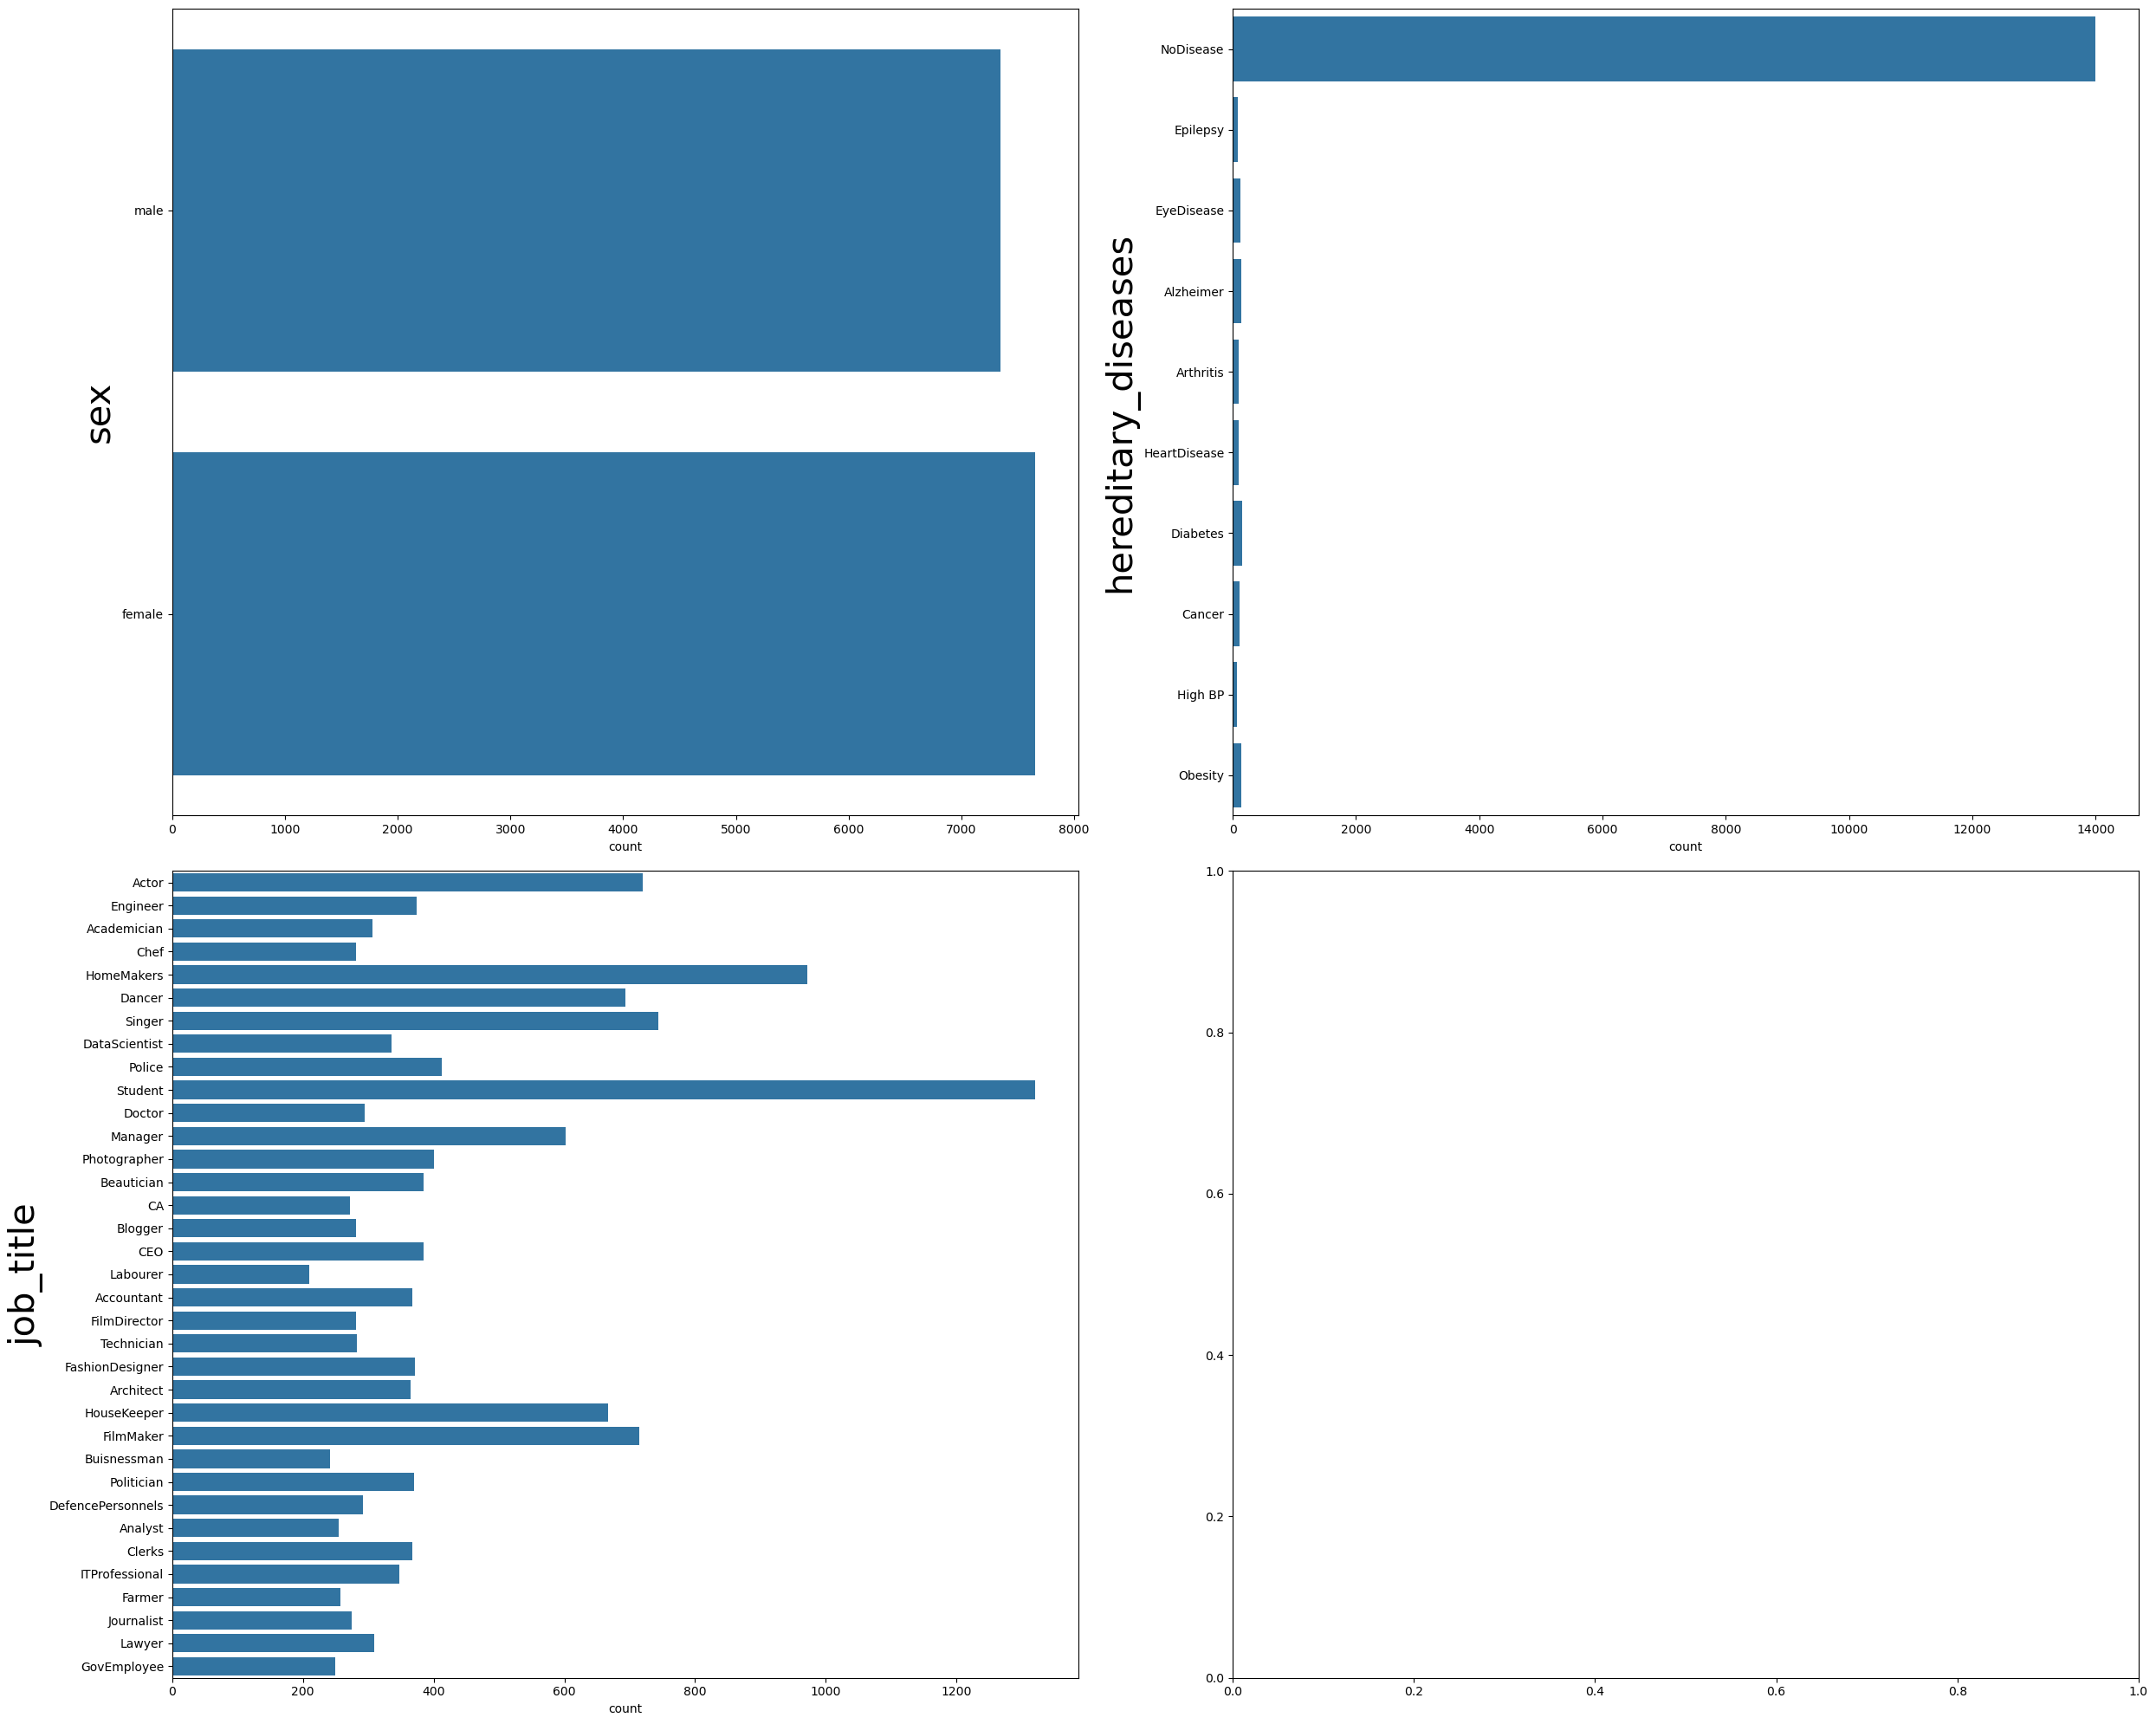

In [18]:
df_categoric_features = df_insurance.select_dtypes(include='object').drop(['city'], axis=1)

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(2, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df_insurance[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

### Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

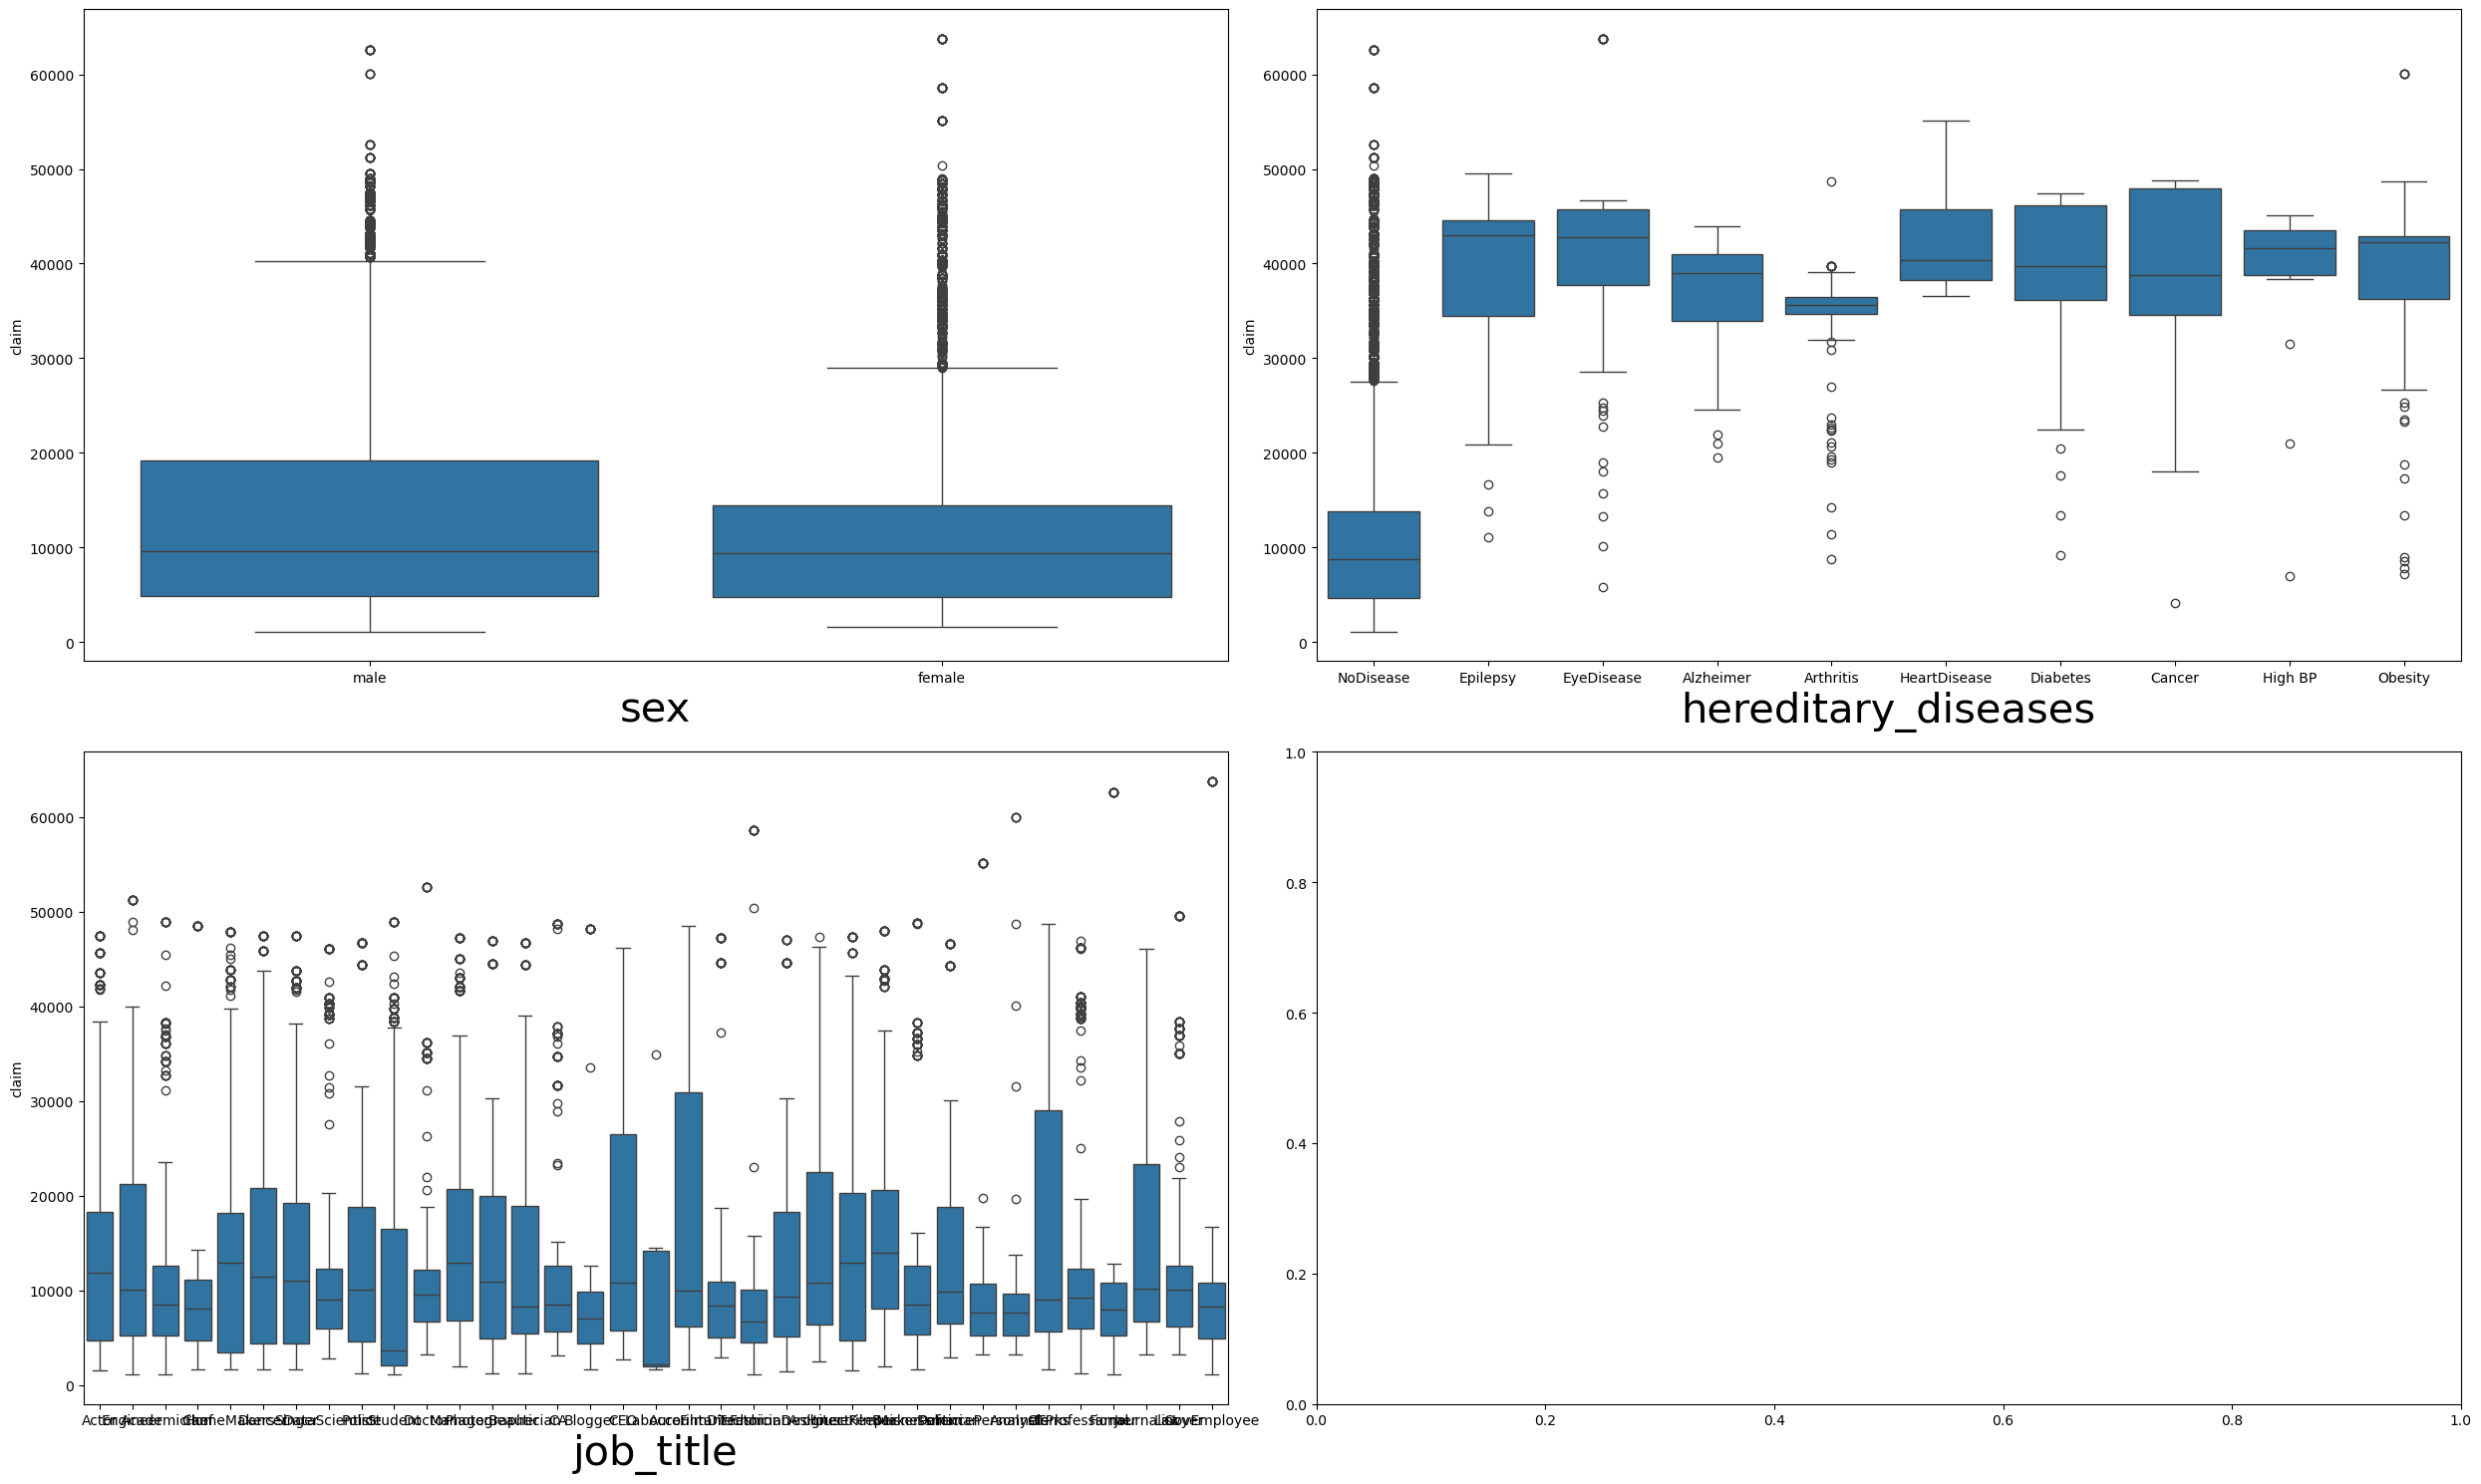

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='claim', data=df_insurance, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

### Feature Engineering

Create a new feature 'region' by combining the cities.

**There are 91 unique cities. We will divide these cities into North-East, West, Mid-West, and South regions.**

Let's create a new variable region. We will replace the original variable `city` with it.

In [7]:
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [8]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [9]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [10]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [11]:
# check the unique values of the region using 'unique()'
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [12]:
df_insurance['region'].value_counts()

region
Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: count, dtype: int64

In [13]:
df_insurance = df_insurance.drop(['city'], axis=1)

#### Analyze relationship between region and claim variable

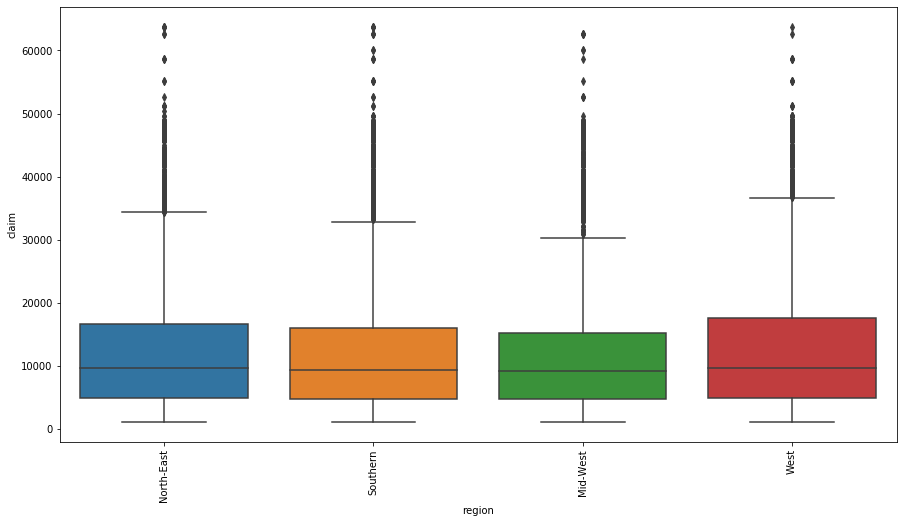

In [ ]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="region", y="claim", data=df_insurance)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

The plot shows that there is not much significant difference in the variance of the insurance claim across the regions.

### Discover Outliers

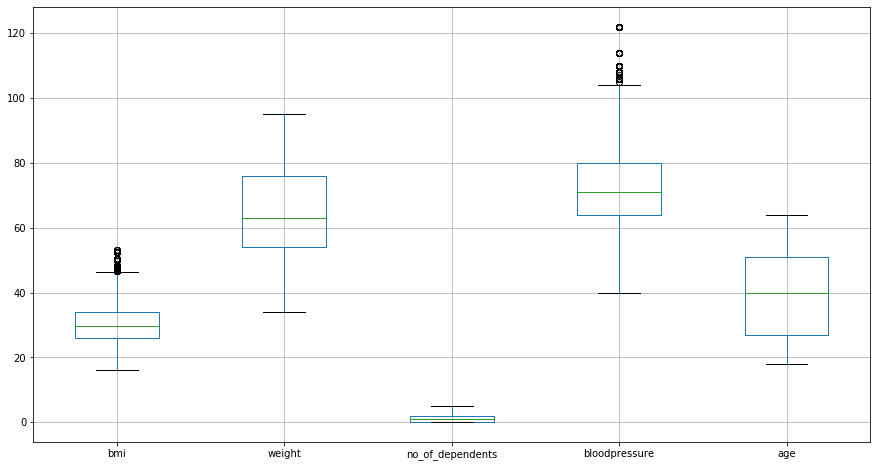

In [ ]:
# set the plot size
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
df_numeric_features.boxplot(column=['bmi', 'weight','no_of_dependents', 'bloodpressure', 'age'])

# to display the plot
plt.show()

There are no extreme outliers in our data.

## Univariate Analysis

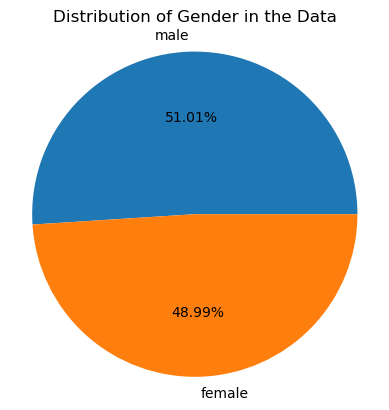

In [23]:
plt.pie(df_insurance['sex'].value_counts(), autopct = '%.2f%%', radius = 1.1, labels = df_insurance['sex'].unique())
plt.title('Distribution of Gender in the Data')
plt.show()

## Prepare the Data

### Dummy Encoding of Categorical Variables

In [24]:
df = pd.get_dummies(df_insurance, drop_first= True, dtype= 'int')
df

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim,sex_male,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,60.0,64,24.3,1,0,72,0,0,13112.6,1,...,0,0,0,0,0,0,0,1,0,0
1,49.0,75,22.6,1,0,78,1,1,9567.0,0,...,0,0,0,0,0,0,0,1,0,0
2,32.0,64,17.8,2,1,88,1,1,32734.2,0,...,0,0,0,0,0,0,0,1,0,0
3,61.0,53,36.4,1,1,72,1,0,48517.6,0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,50,20.6,0,0,82,1,0,1731.7,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.0,49,28.3,1,1,54,1,0,21082.2,1,...,0,0,0,0,0,0,0,0,1,0
14996,39.0,74,29.6,4,0,64,1,0,7512.3,1,...,0,0,0,0,0,1,0,0,1,0
14997,20.0,62,33.3,0,0,52,1,0,1391.5,1,...,0,0,0,0,0,0,0,0,1,0
14998,52.0,88,36.7,0,0,70,1,0,9144.6,1,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression (OLS)

**1. Split the data into training and test sets**

In [26]:
# add the intercept column to the dataset
df = sm.add_constant(df)

# separate the independent and dependent variables
X = df.drop(['claim'], axis=1)

# extract the target variable from the data set
y = df[['claim']]

# split data into train subset and test subset for predictor and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (12000, 56)
The shape of X_test is: (3000, 56)
The shape of y_train is: (12000, 1)
The shape of y_test is: (3000, 1)


**2. Build model using sm.OLS().fit()**

In [29]:
# build a full model using OLS()
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     709.1
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:13:33   Log-Likelihood:            -1.2125e+05
No. Observations:               12000   AIC:                         2.426e+05
Df Residuals:                   11944   BIC:                         2.430e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.97 and indicates that there is no autocorrelation. The Condition Number 4640 suggests that there is severe collinearity.

**3. Predict the values using test set**

In [30]:
# predict the 'log_claim' using predict()
linreg_full_model_predictions = linreg_full_model.predict(X_test)

**4. Compute accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [32]:
# calculate R-squared using rsquared
linreg_full_model_rsquared = linreg_full_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_rsquared_adj = linreg_full_model.rsquared_adj 

**5. Tabulate the results**

In [44]:
linreg_full_model_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'R-Squared': linreg_full_model_rsquared,
                     'Adj. R-Squared': linreg_full_model_rsquared_adj     
                   })

In [45]:
linreg_full_model_metrics

Model_Name        Linreg full model with log of target variable
R-Squared                                               0.76555
Adj. R-Squared                                          0.76447
dtype: object

#### Calculate the p-values to know the insignificant variables

In [46]:
linreg_full_model_pvalues = pd.DataFrame(linreg_full_model.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_pvalues

,P-Value
const,2.572435e-02
age,0.000000e+00
weight,1.336161e-16
bmi,8.791099e-91
no_of_dependents,1.914319e-22
smoker,0.000000e+00
bloodpressure,6.427627e-08
diabetes,8.853654e-26
regular_ex,1.337457e-08
sex_male,7.801267e-01


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [47]:
# select insignificant variables
insignificant_variables = linreg_full_model_pvalues[
                                                        linreg_full_model_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Diabetes',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_EyeDisease',
 'hereditary_diseases_High BP',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Singer',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West']

## Fine Tune Linear Regression Model (OLS)

### Linear Regression after Removing Insignificant Variable (OLS)

**1. Consider the significant variables**

In [50]:
# drop the insignificant variables
df_insurance_significant = df.drop(columns = ['sex_male',
 'hereditary_diseases_Cancer',
 'hereditary_diseases_Diabetes',
 'hereditary_diseases_Epilepsy',
 'hereditary_diseases_EyeDisease',
 'hereditary_diseases_High BP',
 'hereditary_diseases_Obesity',
 'job_title_Accountant',
 'job_title_Actor',
 'job_title_Architect',
 'job_title_Beautician',
 'job_title_Blogger',
 'job_title_Buisnessman',
 'job_title_CA',
 'job_title_CEO',
 'job_title_Clerks',
 'job_title_Dancer',
 'job_title_DefencePersonnels',
 'job_title_Farmer',
 'job_title_FashionDesigner',
 'job_title_FilmDirector',
 'job_title_FilmMaker',
 'job_title_GovEmployee',
 'job_title_HomeMakers',
 'job_title_HouseKeeper',
 'job_title_ITProfessional',
 'job_title_Journalist',
 'job_title_Lawyer',
 'job_title_Police',
 'job_title_Singer',
 'job_title_Technician',
 'region_North-East',
 'region_Southern',
 'region_West'])

**2. Split the data into training and test sets**

In [55]:
# add the intercept column to the dataset
df_insurance_significant = sm.add_constant(df_insurance_significant)

# separate the independent and dependent variables
X = df_insurance_significant.drop(['claim'], axis=1)

# extract the target variable from the data set
y = df_insurance_significant[['claim']]

# split data into train subset and test subset for predictor and target variables
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train_significant.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test_significant.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (12000, 22)
The shape of X_test is: (3000, 22)
The shape of y_train is: (12000, 1)
The shape of y_test is: (3000, 1)


**Build model using sm.OLS().fit()**

In [56]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train, X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1850.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:59:39   Log-Likelihood:            -1.2128e+05
No. Observations:               12000   AIC:                         2.426e+05
Df Residuals:                   11978   BIC:                         2.428e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

This model explains 76.4% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.97 and indicates that there is no autocorrelation. The Condition Number is 1630 suggests that there is severe collinearity.

**2. Predict the values using test set**

In [57]:
# predict the 'claim' using predict()
predicted_claim = linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'claim' values from the test data
actual_claim = y_test

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [58]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [60]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })

linreg_model_with_significant_var_metrics

Model_Name        Linreg full model with significant variables
R-Squared                                             0.764309
Adj. R-Squared                                        0.763896
dtype: object

## Conclusion

The model with significant variables is giving almost the same results as full model with less number of variables.